## Diabetes 

The classic diabetes dataset.

#### Confirm virtual environment

In [41]:
import sys
sys.executable

'/Users/olivertiong/Documents/MACHINE_LEARNING/env/bin/python'

### 1. Set up

In [42]:
import sklearn
import numpy as np
import pandas as pd
import os

pd.options.display.float_format = '{:.6f}'.format

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "diabetes"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2. Get the data

In [43]:
from sklearn.datasets import load_diabetes

X,y= load_diabetes(return_X_y=True)
columns = ['age in years','sex','bmi','avg blood pressure', 's1 tc, total serum cholesterol','s2 ldl, low-density lipoproteins','s3 hdl, high-density lipoproteins',
's4 tch, total cholesterol / HDL',
's5 ltg, possibly log of serum triglycerides level',
's6 glu, blood sugar level']

diabetes = pd.DataFrame(X, columns=columns)
diabetes['y'] = y
print(f"Shape: {X.shape}")
diabetes.head()

Shape: (442, 10)


,age in years,sex,bmi,avg blood pressure,"s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level",y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.000000
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.000000
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.000000
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.000000
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.000000


In [44]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   age in years                                       442 non-null    float64
 1   sex                                                442 non-null    float64
 2   bmi                                                442 non-null    float64
 3   avg blood pressure                                 442 non-null    float64
 4   s1 tc, total serum cholesterol                     442 non-null    float64
 5   s2 ldl, low-density lipoproteins                   442 non-null    float64
 6   s3 hdl, high-density lipoproteins                  442 non-null    float64
 7   s4 tch, total cholesterol / HDL                    442 non-null    float64
 8   s5 ltg, possibly log of serum triglycerides level  442 non-null    float64
 9   s6 glu, bl

In [45]:
diabetes.describe()

,age in years,sex,bmi,avg blood pressure,"s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level",y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,152.133484
std,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,77.093005
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.037299,-0.044642,-0.034229,-0.036656,-0.034248,-0.030358,-0.035117,-0.039493,-0.033246,-0.033179,87.000000
50%,0.005383,-0.044642,-0.007284,-0.005670,-0.004321,-0.003819,-0.006584,-0.002592,-0.001947,-0.001078,140.500000
75%,0.038076,0.050680,0.031248,0.035644,0.028358,0.029844,0.029312,0.034309,0.032432,0.027917,211.500000
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612,346.000000


array([[<Axes: title={'center': 'age in years'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'avg blood pressure'}>,
        <Axes: title={'center': 's1 tc, total serum cholesterol'}>,
        <Axes: title={'center': 's2 ldl, low-density lipoproteins'}>],
       [<Axes: title={'center': 's3 hdl, high-density lipoproteins'}>,
        <Axes: title={'center': 's4 tch, total cholesterol / HDL'}>,
        <Axes: title={'center': 's5 ltg, possibly log of serum triglycerides level'}>],
       [<Axes: title={'center': 's6 glu, blood sugar level'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

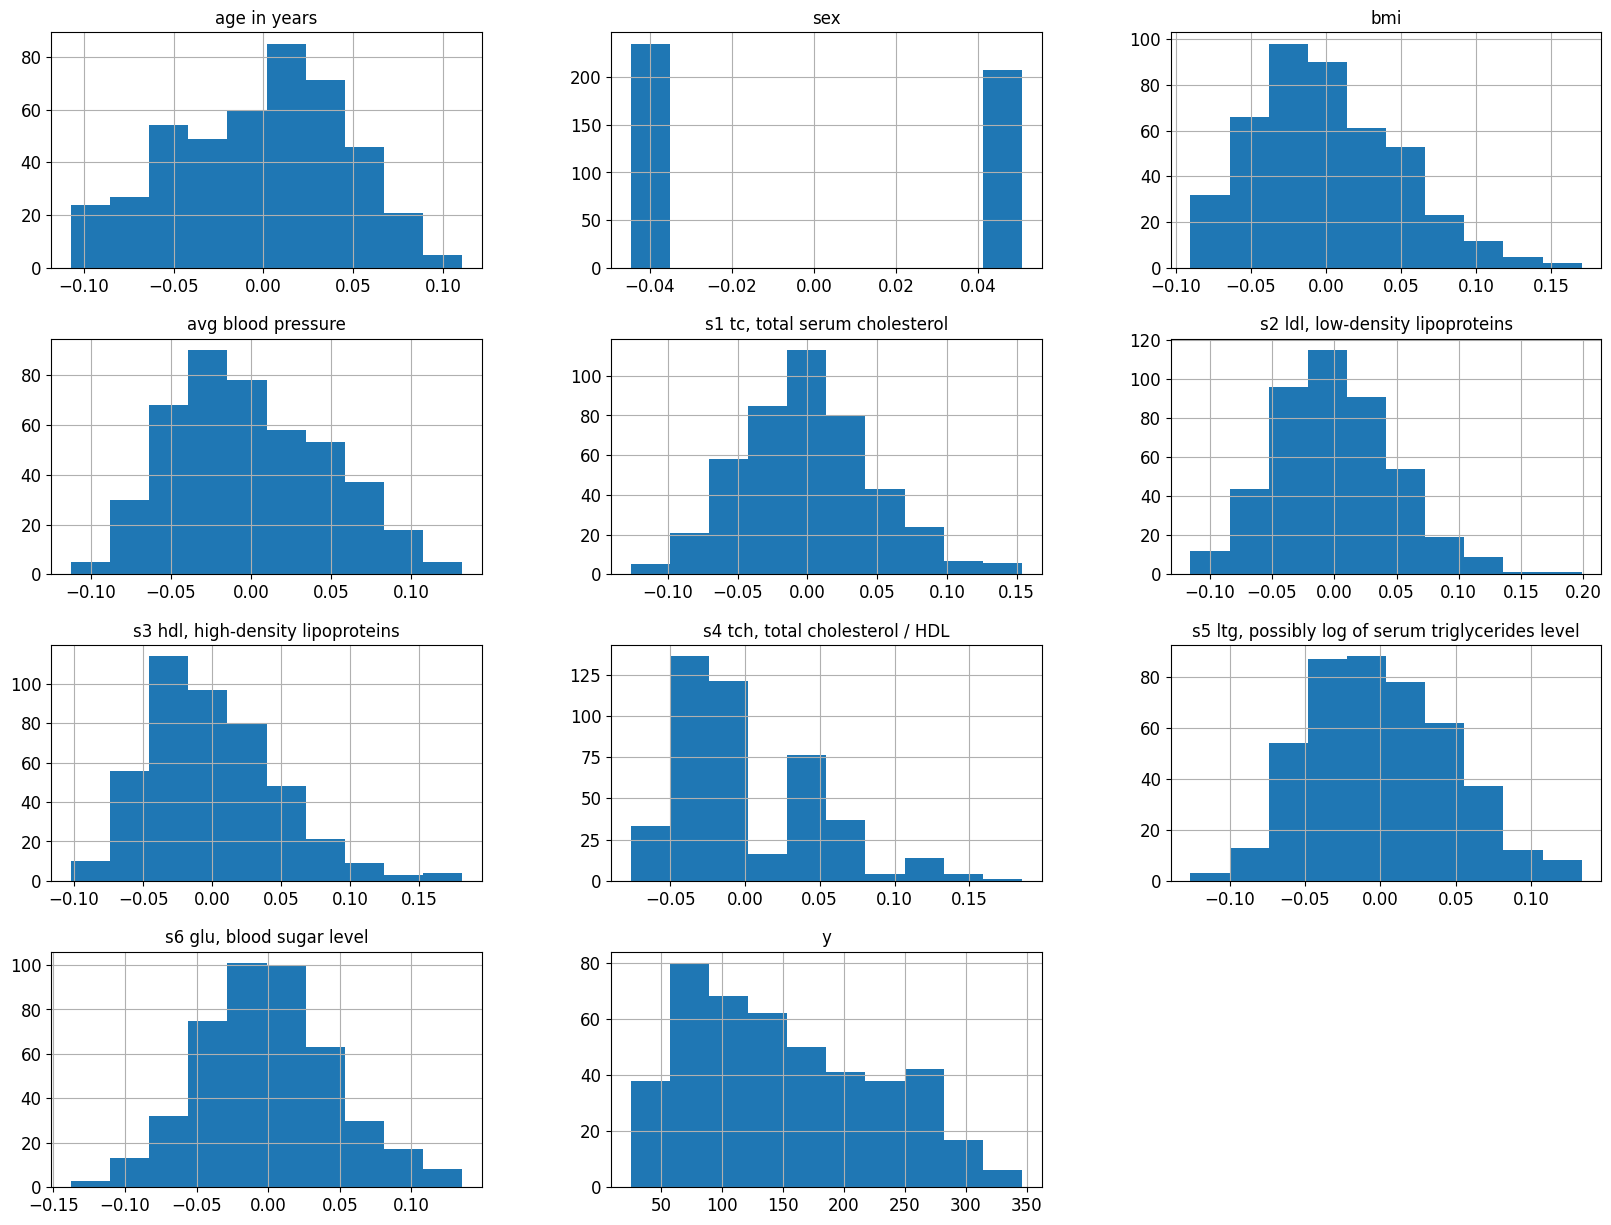

In [46]:
diabetes.hist(figsize=(20,15))

Note: From inspection we can see the diabetes dataset has been standardised.

### Create a test set

The dataset is small with only 442 rows. It may be worth exploring stratified sampling by age, maybe even BMI, both of which intuitively would seem to be strongly correlated with diabetes.


In [47]:
diabetes['age_cat'] = pd.cut(diabetes['age in years'], bins=10, labels = list(range(1,11)))

In [48]:
diabetes['bmi_cat'] = pd.cut(diabetes['bmi'], bins=10, labels = list(range(1,11)))

In [49]:
diabetes.head()

,age in years,sex,bmi,avg blood pressure,"s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level",y,age_cat,bmi_cat
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.000000,7,6
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.000000,5,2
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.000000,9,6
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.000000,1,4
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.000000,6,3


In [50]:
diabetes['age_cat'].value_counts()

age_cat
6     85
7     71
5     60
3     54
4     49
8     46
2     27
1     24
9     21
10     5
Name: count, dtype: int64

In [51]:
diabetes['bmi_cat'].value_counts()

bmi_cat
3     98
4     90
2     66
5     61
6     53
1     32
7     23
8     12
9      5
10     2
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(diabetes, diabetes["age_cat"]):
    strat_train_set = diabetes.loc[train_index]
    strat_test_set = diabetes.loc[test_index]

In [53]:
strat_test_set["age_cat"].value_counts() / len(strat_test_set)

age_cat
6    0.191011
7    0.157303
5    0.134831
3    0.123596
4    0.112360
8    0.101124
2    0.067416
1    0.056180
9    0.044944
10   0.011236
Name: count, dtype: float64

In [54]:
diabetes["age_cat"].value_counts() / len(diabetes)

age_cat
6    0.192308
7    0.160633
5    0.135747
3    0.122172
4    0.110860
8    0.104072
2    0.061086
1    0.054299
9    0.047511
10   0.011312
Name: count, dtype: float64

We can see we have a similar distribution across age categories in the test set.
What happens if we do simple random sampling. We define a function to test for the feature we use to stratify by.

In [55]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42)

def age_cat_proportions(data):
    return data["age_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": age_cat_proportions(diabetes),
    "Stratified": age_cat_proportions(strat_test_set),
    "Random": age_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [56]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
age_cat,,,,,
1,0.054299,0.056180,0.078652,44.850187,3.464419
2,0.061086,0.067416,0.056180,-8.031627,10.362047
3,0.122172,0.123596,0.168539,37.952559,1.165210
4,0.110860,0.112360,0.146067,31.758771,1.352901
5,0.135747,0.134831,0.101124,-25.505618,-0.674157
6,0.192308,0.191011,0.134831,-29.887640,-0.674157
7,0.160633,0.157303,0.146067,-9.067890,-2.073113
8,0.104072,0.101124,0.112360,7.962872,-2.833415
9,0.047511,0.044944,0.011236,-76.350990,-5.403959


We can see there are some larger %errors with random sampling alone. Stratifying the sampling provides a more representative proportion of different ages in the test set. We can then remove the age cat feature we created.

In [57]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)
    set_.drop("bmi_cat", axis=1, inplace=True)

## Explore and visualise data

In [58]:
diabetes = strat_train_set.copy()

#### Correlation

In [59]:
import seaborn as sns
corr_matrix = diabetes.corr()
corr_matrix['y'].sort_values(ascending=False)

y                                                    1.000000
bmi                                                  0.590394
s5 ltg, possibly log of serum triglycerides level    0.572706
s4 tch, total cholesterol / HDL                      0.447805
avg blood pressure                                   0.422920
s6 glu, blood sugar level                            0.373297
s1 tc, total serum cholesterol                       0.214293
s2 ldl, low-density lipoproteins                     0.180712
age in years                                         0.165361
sex                                                  0.019015
s3 hdl, high-density lipoproteins                   -0.406484
Name: y, dtype: float64

As anticipated BMI has a strong correlation with the target, that is measure of disease progression 1 year after baseline. There seems to be quite a few correlated features.

Saving figure scatter_matrix_plot


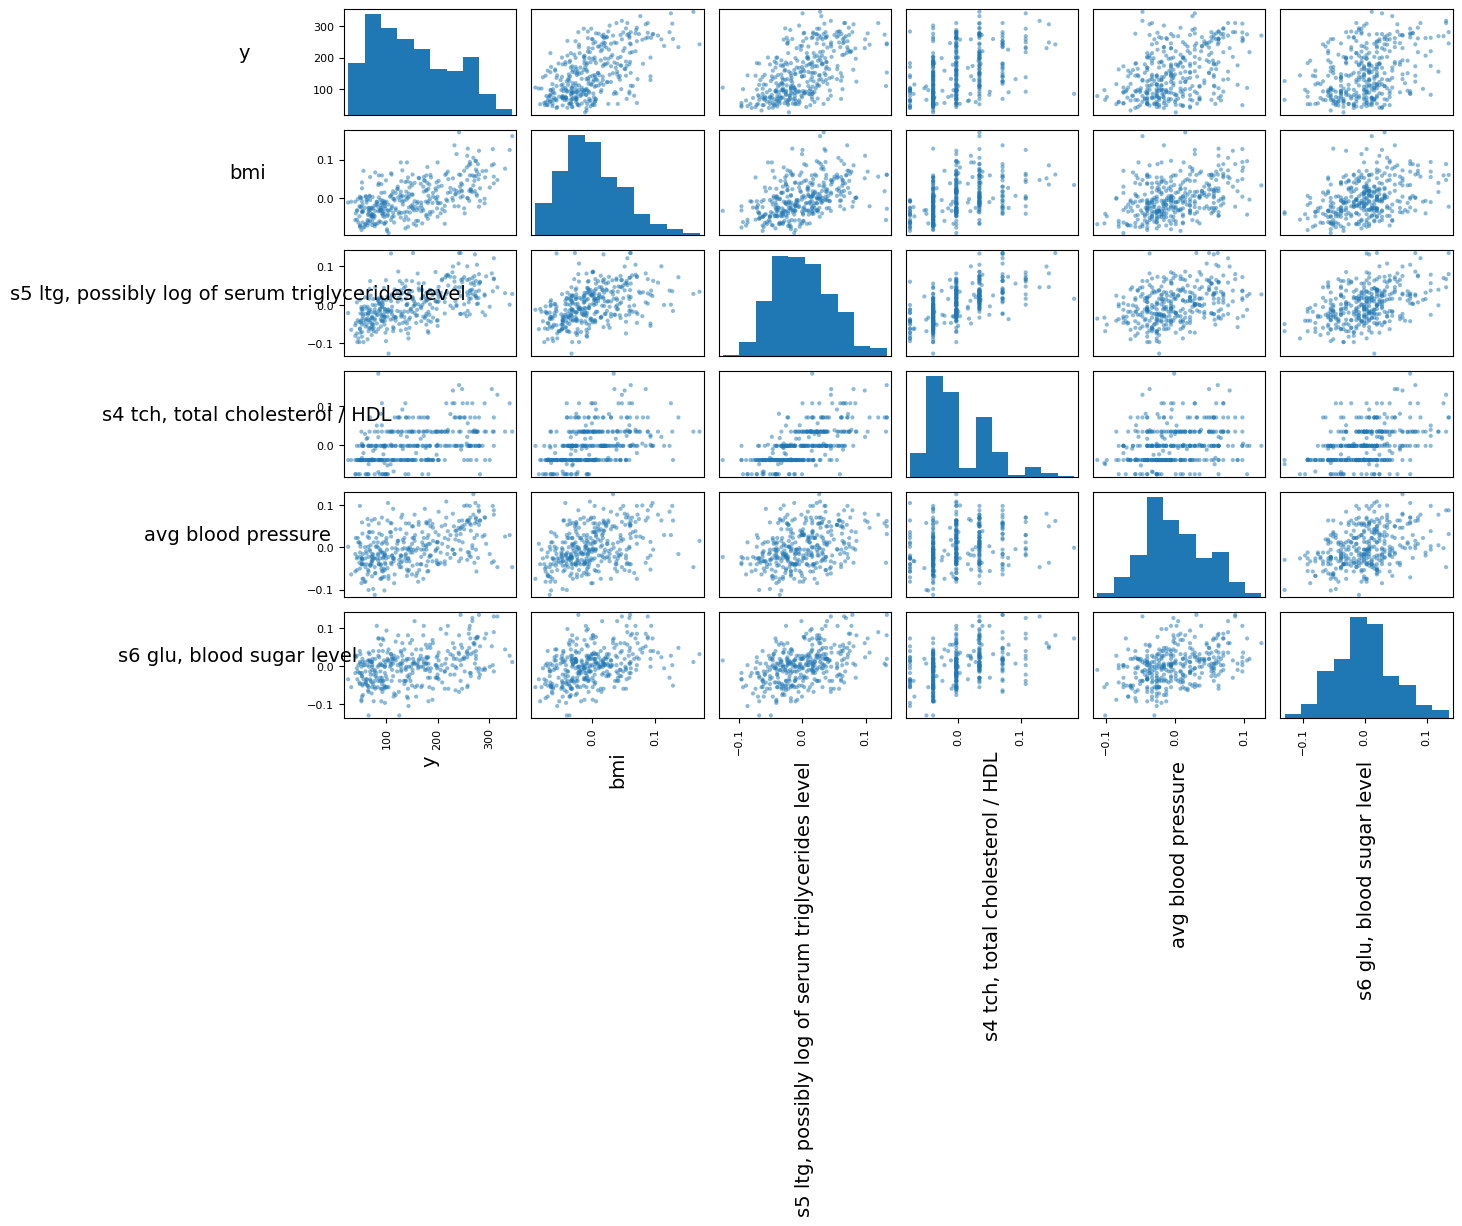

In [60]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["y", "bmi", "s5 ltg, possibly log of serum triglycerides level",
              "s4 tch, total cholesterol / HDL","avg blood pressure","s6 glu, blood sugar level"]
axs = scatter_matrix(diabetes[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")


n = len(attributes)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

Most plots are as expected in terms of their correlation with the target. However s4 tch, total cholesterol / HDL has lots of values building up at certain levels, suggesting the values for this feature are non-continuous or have been rounded.

This feature represents measurements for the S4 index a ratio of total cholesterol level to high-density lipoprotein cholesterol. Lower ratios are generally considered to be more healthy, and a higher ratio is a higher risk for heart disease. We could expect ratios around the range 0-5, however our data appears to of been standardised.

<Axes: xlabel='s4 tch, total cholesterol / HDL', ylabel='y'>

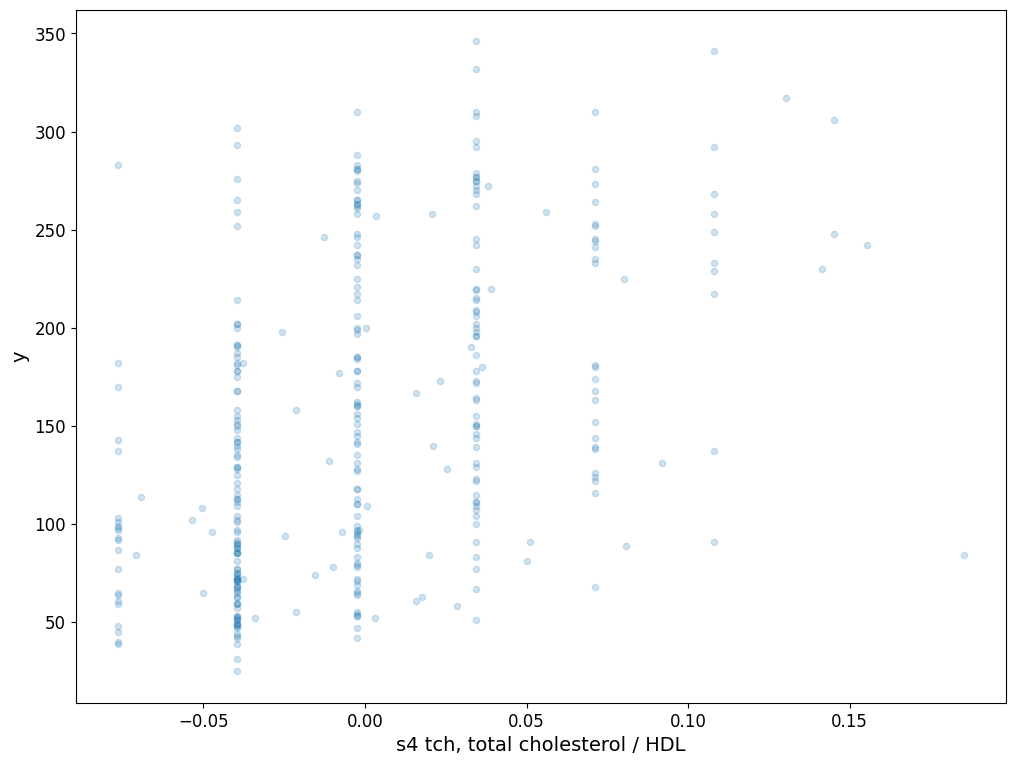

In [61]:
diabetes.plot(kind="scatter", x="s4 tch, total cholesterol / HDL", y="y",
             alpha=0.2, figsize=(12,9))

In [62]:
diabetes['s4 tch, total cholesterol / HDL'].value_counts()

s4 tch, total cholesterol / HDL
-0.039493    105
-0.002592     83
0.034309      59
0.071210      25
-0.076395     22
0.108111      10
-0.037648      2
0.145012       2
-0.021412      2
0.015858       2
-0.009972      1
-0.033958      1
0.017703       1
0.000729       1
0.032833       1
0.036154       1
-0.007020      1
0.002943       1
-0.070859      1
-0.011080      1
0.023239       1
-0.012556      1
0.019917       1
0.185234       1
0.155345       1
-0.069383      1
0.091875       1
-0.047243      1
-0.015508      1
-0.050195      1
0.141322       1
-0.025840      1
0.050914       1
-0.008127      1
0.037999       1
0.056081       1
0.130252       1
0.003312       1
-0.024733      1
-0.050564      1
0.021024       1
0.080804       1
0.039106       1
0.028405       1
-0.001854      1
0.080066       1
0.020655       1
0.025453       1
0.000360       1
-0.053516      1
0.050176       1
Name: count, dtype: int64

In [63]:
s4_tch = diabetes['s4 tch, total cholesterol / HDL'].value_counts()/len(diabetes)
print(f"Top 6 values for s4 tch: \n{s4_tch.iloc[:6]}")
print(f"Total proportion contained within these values: {round(s4_tch.iloc[:6].sum(),2)}")

Top 6 values for s4 tch: 
s4 tch, total cholesterol / HDL
-0.039493   0.297450
-0.002592   0.235127
0.034309    0.167139
0.071210    0.070822
-0.076395   0.062323
0.108111    0.028329
Name: count, dtype: float64
Total proportion contained within these values: 0.86


Looking at the spread of the data, there would seem to be significant discretisation, with 86% of the data taking 6 values. Let's look closer at these 6 values.

In [64]:
top_s4tch = diabetes['s4 tch, total cholesterol / HDL'].value_counts().index.tolist()[:6]
top_s4tch.sort()
top_s4tch = np.array(top_s4tch)
diff_list = np.diff(top_s4tch)
top_s4tch.tolist()
print(f"Ordered top six values:{top_s4tch}")

print(f"Differences:{diff_list}")

Ordered top six values:[-0.0763945  -0.03949338 -0.00259226  0.03430886  0.07120998  0.1081111 ]
Differences:[0.03690112 0.03690112 0.03690112 0.03690112 0.03690112]


In [65]:
# bit of an experimentation to look at integer possibilities
top_s4tch_np = np.array(top_s4tch)*27.099
print(top_s4tch_np)

[-2.07021466 -1.07023118 -0.07024771  0.92973577  1.92971924  2.92970272]


They seem to be evenly spaced (accurately enough for this purpose). 


Creating a new feature by categorising s4 TCH/HCL may be helpful for linear models later down the line.


In [66]:
# find min and max values
s4_min = round(diabetes['s4 tch, total cholesterol / HDL'].min(),6)
s4_max = diabetes['s4 tch, total cholesterol / HDL'].max()

bin_size = diff_list.mean()/2

bin_edges = [s4_min,top_s4tch[0]+bin_size,top_s4tch[1]+bin_size, top_s4tch[2]+bin_size, top_s4tch[3]+bin_size, top_s4tch[4]+bin_size, s4_max]

In [67]:
diabetes['s4_tch_cat'] = pd.cut(diabetes['s4 tch, total cholesterol / HDL'],bins=bin_edges,labels = top_s4tch)
diabetes.head()


,age in years,sex,bmi,avg blood pressure,"s1 tc, total serum cholesterol","s2 ldl, low-density lipoproteins","s3 hdl, high-density lipoproteins","s4 tch, total cholesterol / HDL","s5 ltg, possibly log of serum triglycerides level","s6 glu, blood sugar level",y,s4_tch_cat
398,0.012648,-0.044642,0.015350,-0.033213,0.041086,0.032193,-0.002903,-0.002592,0.045067,-0.067351,242.000000,-0.002592
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.000000,-0.002592
342,0.056239,0.050680,0.021817,0.056301,-0.007073,0.018101,-0.032356,-0.002592,-0.023647,0.023775,178.000000,-0.002592
405,0.048974,0.050680,0.123131,0.083844,-0.104765,-0.100895,-0.069172,-0.002592,0.036644,-0.030072,281.000000,-0.002592
160,-0.009147,-0.044642,-0.062252,-0.074527,-0.023584,-0.013214,0.004460,-0.039493,-0.035816,-0.046641,53.000000,-0.039493


The feature 's4 tch, total cholesterol / HDL' is still numeric so ordinal encoding may be a good approach. It may still be worth using in the original numeric form, and using appropriate models such as tree-based approaches; to be explored later.

## Prepare data for machine learning algorithms

Here we create two datasets one with s4 as a numerical value, and one with s4 as a categorical value

In [68]:
y_train = diabetes['y']

y_test = strat_test_set['y']
x_test = strat_test_set.drop("y",axis=1)

# s4 as categorical
diabetes_s4_cat = diabetes.drop(["y","s4 tch, total cholesterol / HDL"],axis=1)
# s4 as numeric
diabetes_s4_num = diabetes.drop(["y","s4_tch_cat"],axis=1)

### Handling categorical attributes

In [69]:
diabetes_cat = diabetes[['s4_tch_cat']]
diabetes_s4tch = diabetes[['s4 tch, total cholesterol / HDL']]

'''
ordinal_encoder = OrdinalEncoder()
diabetes_cat_encoded = ordinal_encoder.fit_transform(diabetes_cat)
diabetes_cat_encoded[:10]'''

'\nordinal_encoder = OrdinalEncoder()\ndiabetes_cat_encoded = ordinal_encoder.fit_transform(diabetes_cat)\ndiabetes_cat_encoded[:10]'

### Transformation

The numerical data appears to already be standardized, so is transformed already. We combine the numerical and categorical data within a column transformer.

Note: after some experimentation keeping the s4 feature as numerical performs best.

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_features = [c for c in diabetes_cat.columns if c != 's4_tch_cat']
#cat_features = ['s4_tch_cat']
cat_features = None

preprocessor = ColumnTransformer([
        ("num", "passthrough", num_features),
        ("cat", "passthrough", cat_features),])
'''
diabetes_prepared = full_pipeline.fit_transform(diabetes)
diabetes_prepared'''

'\ndiabetes_prepared = full_pipeline.fit_transform(diabetes)\ndiabetes_prepared'

### Model Training

We start with a linear model, linear regression. We'll sample some data and look at the predictions.

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pipe_lr = Pipeline([
    ('model', LinearRegression())
])

#lin_reg = LinearRegression()
#lin_reg.fit(diabetes_s4_num,y_train)

pipe_lr.fit(diabetes_s4_num,y_train)
diabetes_predictions_lr = pipe_lr.predict(diabetes_s4_num)
#diabetes_predictions_lr = lin_reg.predict(diabetes_s4_num)
lin_mse_lr = mean_squared_error(y_train, diabetes_predictions_lr)
lin_rmse_lr = np.sqrt(lin_mse_lr)
print(f"Root mean squared error, linear regression: {lin_rmse_lr}")

Root mean squared error, linear regression: 53.4993408351859


#### Compare to target data

In [72]:
print(f"Target values mean:{y_train.mean()}")
print(f"Target values std:{y_train.std()}")
print(f"Target values minimum: {y_train.min()}")
print(f"Target values maximum: {y_train.max()}")

Target values mean:150.88385269121812
Target values std:77.50125068566233
Target values minimum: 25.0
Target values maximum: 346.0


Next we'll try a decision tree regressor.

In [80]:
from sklearn.tree import DecisionTreeRegressor

pipe_tree = Pipeline([
    ('model', DecisionTreeRegressor(random_state=42))
])

pipe_tree.fit(diabetes_s4_num,y_train)
diabetes_predictions_tree = pipe_tree.predict(diabetes_s4_num)
mse_tree = mean_squared_error(y_train, diabetes_predictions_tree)
rmse_tree = np.sqrt(mse_tree)
print(f"Root mean squared error, decision tree regressor: {rmse_tree}")


Root mean squared error, decision tree regressor: 0.0


RMSE of 0.0. Impressive. Smells a bit like overfitting.

How does a support vector machine regressor do.

In [81]:
from sklearn.svm import SVR

pipe_svr = Pipeline([
    ('model', SVR(kernel="linear"))
])

pipe_svr.fit(diabetes_s4_num,y_train)
diabetes_predictions_svr = pipe_svr.predict(diabetes_s4_num)
mse_svr = mean_squared_error(y_train, diabetes_predictions_svr)
rmse_svr = np.sqrt(mse_svr)
print(f"Root mean squared error, support vector machine regressor: {rmse_svr}")

Root mean squared error, support vector machine regressor: 77.4011590988309


Let's try a random forest regressor.

In [84]:
from sklearn.ensemble import RandomForestRegressor

pipe_rfr = Pipeline([
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipe_rfr.fit(diabetes_s4_num,y_train)
diabetes_predictions_rfr = pipe_rfr.predict(diabetes_s4_num)
mse_rfr = mean_squared_error(y_train, diabetes_predictions_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print(f"Root mean squared error, random forest regressor: {rmse_rfr}")

Root mean squared error, random forest regressor: 21.95395016305812


In [95]:
from sklearn.linear_model import Lasso

pipe_lasso = Pipeline([
    ('model', Lasso(alpha=0.1))
])

pipe_lasso.fit(diabetes_s4_num,y_train)
diabetes_predictions_lasso = pipe_lasso.predict(diabetes_s4_num)
mse_lasso = mean_squared_error(y_train, diabetes_predictions_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print(f"Root mean squared error, lasso regression: {rmse_lasso}")

Root mean squared error, lasso regression: 53.995116036652995


In [96]:
from sklearn.linear_model import Ridge

pipe_ridge = Pipeline([
    ('model', Ridge(alpha=0.1))
])

pipe_ridge.fit(diabetes_s4_num,y_train)
diabetes_predictions_ridge = pipe_ridge.predict(diabetes_s4_num)
mse_ridge = mean_squared_error(y_train, diabetes_predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f"Root mean squared error, ridge regression: {rmse_ridge}")

Root mean squared error, ridge regression: 53.84872118299606


### Using cross-validation

Evaluate some of the most promising models more thoroughly.

In [36]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(pipe_tree, diabetes_s4_num, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [37]:
def display_scores(scores,model):
    print(f"{model} Scores: {scores}")
    print(f"{model} Mean: {scores.mean()}")
    print(f"{model} Standard deviation: {scores.std()}")

display_scores(tree_rmse_scores,"Tree")

Tree Scores: [67.55368236 87.47126512 85.87410035 75.72487797 73.63423117 84.5678088
 67.60050718 79.48009634 77.78725566 88.90894218]
Tree Mean: 78.86027671337891
Tree Standard deviation: 7.417504683984155


In [38]:
lr_scores = cross_val_score(pipe_lr, diabetes_s4_num, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
display_scores(lr_rmse_scores,"Linear Regression")

Linear Regression Scores: [51.30404331 60.58796213 55.97614775 51.04043608 62.04606009 54.93614401
 46.93940962 57.84708347 50.56500953 59.29199734]
Linear Regression Mean: 55.05342933303804
Linear Regression Standard deviation: 4.714958156655616


In [85]:
rfr_scores = cross_val_score(pipe_rfr, diabetes_s4_num, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)
display_scores(rfr_rmse_scores,"Random forest regressor")

Random forest regressor Scores: [57.63386977 63.97265477 55.15460175 51.62600438 65.27371311 62.27678875
 57.02565385 57.84048827 59.01067276 56.50968097]
Random forest regressor Mean: 58.63241283786772
Random forest regressor Standard deviation: 3.9490054032532833


In [97]:
ridge_scores = cross_val_score(pipe_ridge, diabetes_s4_num, y_train,
                         scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores,"Ridge regression")

Ridge regression Scores: [52.35875359 61.07530033 56.6326977  48.83088861 61.76350741 54.39157114
 48.11339674 58.20228141 49.92350395 58.55759276]
Ridge regression Mean: 54.98494936455303
Ridge regression Standard deviation: 4.7626592980146


In [98]:
lasso_scores = cross_val_score(pipe_lasso, diabetes_s4_num, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores,"Lasso regression")

Lasso regression Scores: [52.55191482 61.83650036 55.66054436 48.29992683 61.20287573 54.39681015
 49.46429304 57.11498628 51.7279335  58.98060515]
Lasso regression Mean: 55.123639021641374
Lasso regression Standard deviation: 4.454364734604399


## Fine tune the model

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # only alpha to tune
    {'alpha':[0.05,0.1,0.5,1.0,10.0]}
  ]

ridge_reg = Ridge()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(ridge_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(diabetes_s4_num, y_train)

,estimator,Ridge()
,param_grid,"[{'alpha': [0.05, 0.1, ...]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.05


In [108]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

55.14222036178102 {'alpha': 0.05}
55.190828769021266 {'alpha': 0.1}
56.96932094832031 {'alpha': 0.5}
59.35919333527603 {'alpha': 1.0}
71.66827191354665 {'alpha': 10.0}


The performance seems to improve with less regularisation.

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # only alpha to tune
    {'alpha':[0.05,0.1,0.5,1.0,10.0]}
  ]

lasso_reg = Lasso()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_lasso.fit(diabetes_s4_num, y_train)

cvres_lasso = grid_search_lasso.cv_results_
for mean_score, params in zip(cvres_lasso["mean_test_score"], cvres_lasso["params"]):
    print(np.sqrt(-mean_score), params)

55.16613747006995 {'alpha': 0.05}
55.303317659767124 {'alpha': 0.1}
58.06533795947523 {'alpha': 0.5}
62.4085298549499 {'alpha': 1.0}
77.53662533454971 {'alpha': 10.0}


### Evaluate the system on the test set

In [113]:
final_predictions = pipe_lr.predict(x_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Final RMSE: {final_rmse}")

Final RMSE: 53.7935188979862


In [115]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_int = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
print(f"95% confidence interval: {confidence_int}")

95% confidence interval: [45.61196747 60.88541512]


In [119]:
m = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
z_score = np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)
print(f"Z scores: {z_score}")

Z scores: (np.float64(45.734391797818716), np.float64(60.79350917441441))
